In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import sys
sys.path.append("/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/analysisTools")
import plotTools as ptools

In [2]:
f_qcd = "/uscms_data/d3/sbrightt/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/outputs/bkg/bkg_2018_QCD_TuneCP5_PSWeights_SR_studies.coffea"
qcd = util.load(f_qcd)[0]

In [3]:
cutflows = ['cutDesc', 'cutflow', 'cutflow_cts']
histos = [k for k in qcd.keys() if k not in cutflows]
qcd_samples = list(qcd['cutflow'].keys())
cuts = list(qcd['cutflow'][qcd_samples[0]].keys())
cutNames = {cname:ptools.getCut(qcd['cutDesc'][cname]) for cname in qcd['cutDesc'].keys()}

In [4]:
cut = "cut11"

In [5]:
def makeEffPlot(hname,xlim,cut="cut11",loc='best',logy=False,logx=False,tickx=None,lessThan=True,xlabel=None):
    # vertex chi2
    sampAx = qcd[hname][:,cut,:].axes[0]
    plt.figure(figsize=(8,6))
    for i in range(sampAx.size):
        htest = qcd[hname][sampAx.bin(i),cut,:]
        xb,effb,ctsb = ptools.makeCutEff(htest,lessThan=lessThan)
        plt.plot(xb,effb,label=sampAx.bin(i))
    if logy:
        plt.yscale('log')
    if logx:
        plt.xscale('log')
    if tickx:
        plt.xticks(ticks=np.arange(xlim[0],xlim[1]+tickx,tickx),rotation=45)
    if xlabel:
        plt.xlabel(xlabel)
    plt.grid()
    ncol = min(sampAx.size//3 + sampAx.size % 3 ,3)
    plt.gca().legend(loc='upper center',bbox_to_anchor=(0.5,1),fontsize=7,ncol=ncol)
    plt.ylim([-0.05,1.2])
    plt.xlim(xlim)
    plt.savefig(f"plots/efficiencies/bkgOnly_{hname}.pdf")

# Vertex Quality

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


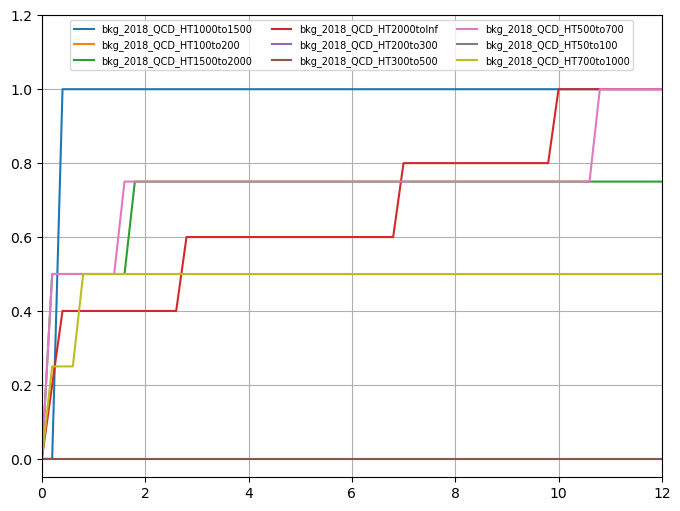

In [6]:
# vertex chi2
hname = "sel_vtx_chi2"
makeEffPlot(hname,[0,12])

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


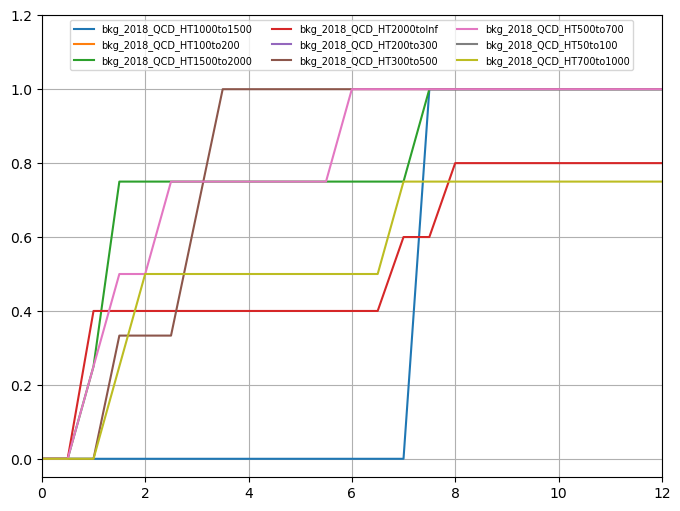

In [7]:
# vertex chi2
hname = "sel_vtx_max_chi2"
makeEffPlot(hname,[0,12])

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


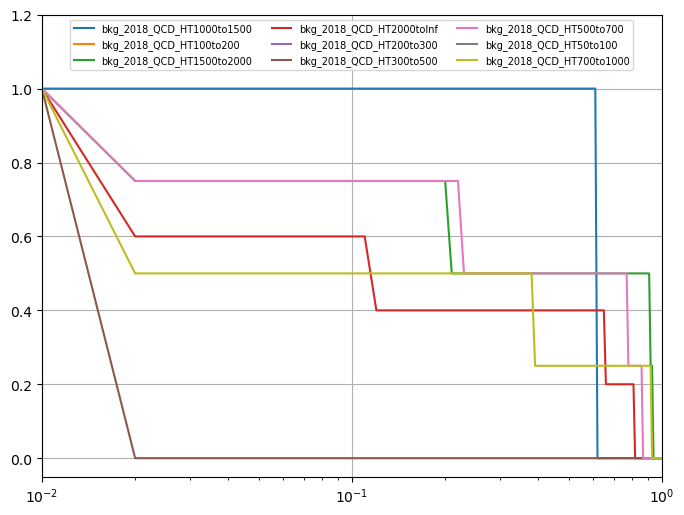

In [8]:
# electron 1 track chi2
hname = "sel_vtx_prob"
makeEffPlot(hname,[0.01,1],logx=True,lessThan=False,loc='upper right')

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


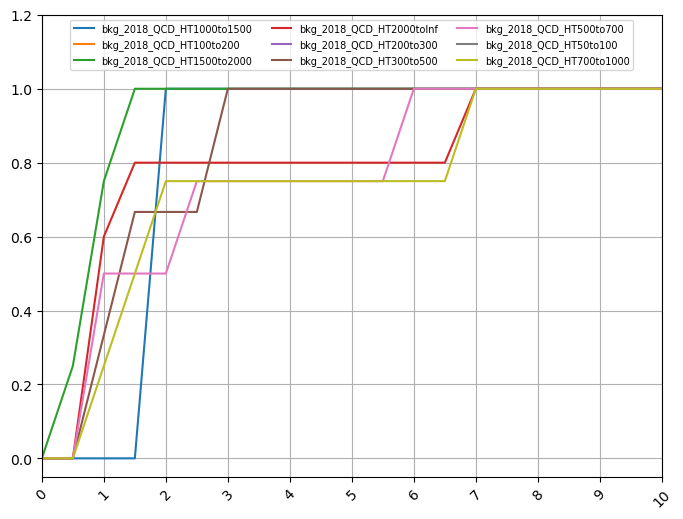

In [9]:
# electron 1 track chi2
hname = "sel_e1_trkChi2"
makeEffPlot(hname,[0,10],tickx=1)

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


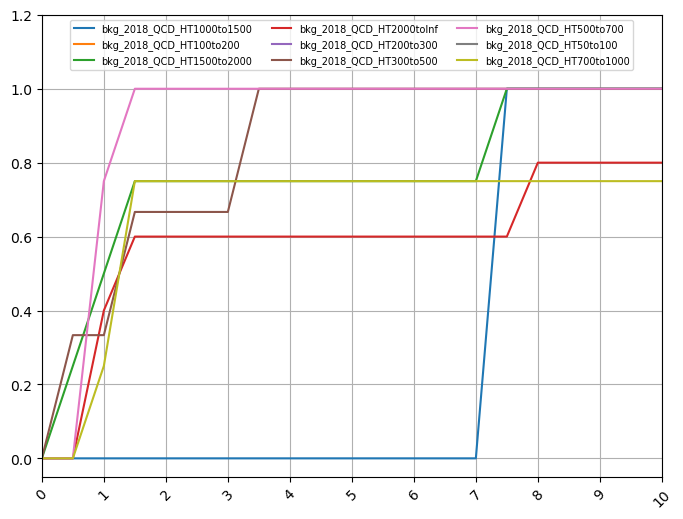

In [10]:
# electron 2 track chi2
hname = "sel_e2_trkChi2"
makeEffPlot(hname,[0,10],tickx=1)

# Vertex dR

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


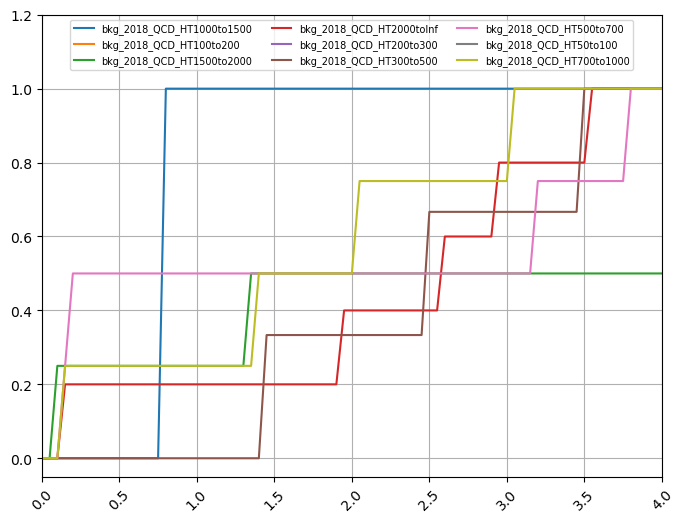

In [11]:
# vertex dR
hname = "sel_vtx_dR"
makeEffPlot(hname,[0,4],loc='lower right',tickx=0.5)

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


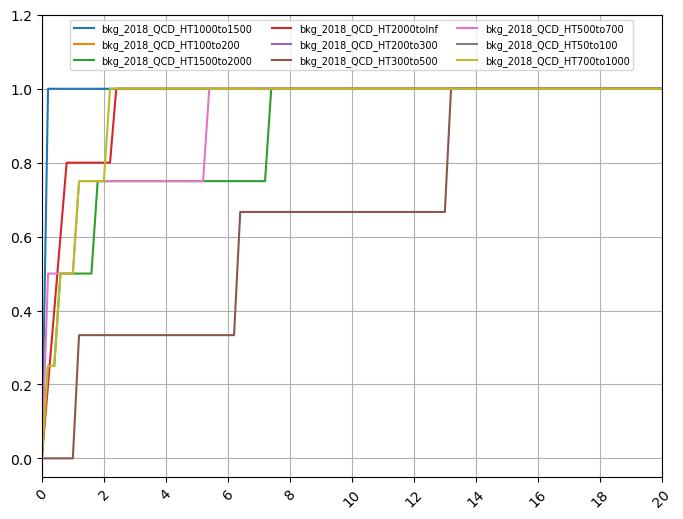

In [12]:
# dR / (pT/m)
hname = "sel_vtx_dR_over_pTm"
makeEffPlot(hname,[0,20],tickx=2)

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


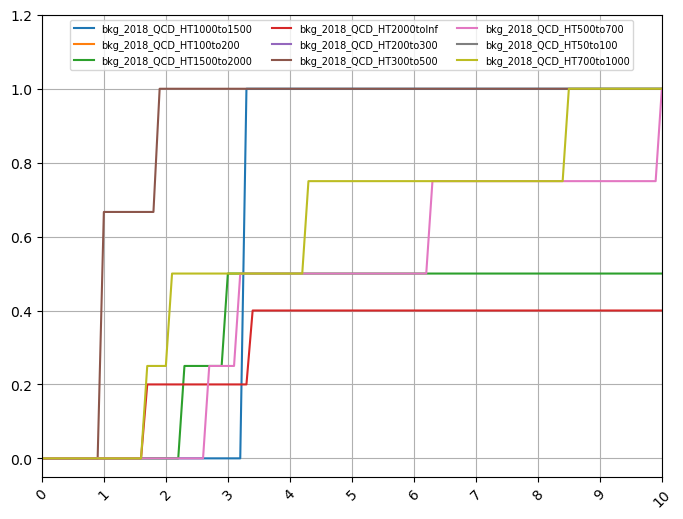

In [13]:
# dR / (m/pT)
hname = "sel_vtx_dR_over_mpT"
makeEffPlot(hname,[0,10],tickx=1,loc='lower right')

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


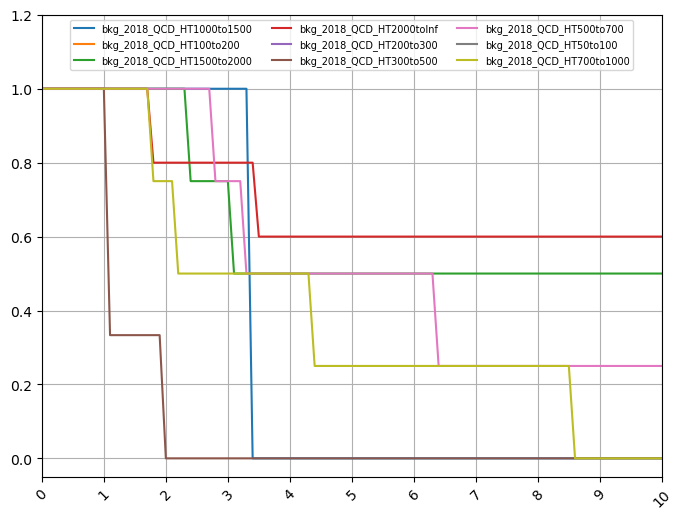

In [14]:
# dR / (m/pT) opposite cut
hname = "sel_vtx_dR_over_mpT"
makeEffPlot(hname,[0,10],tickx=1,loc='lower right',lessThan=False)

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


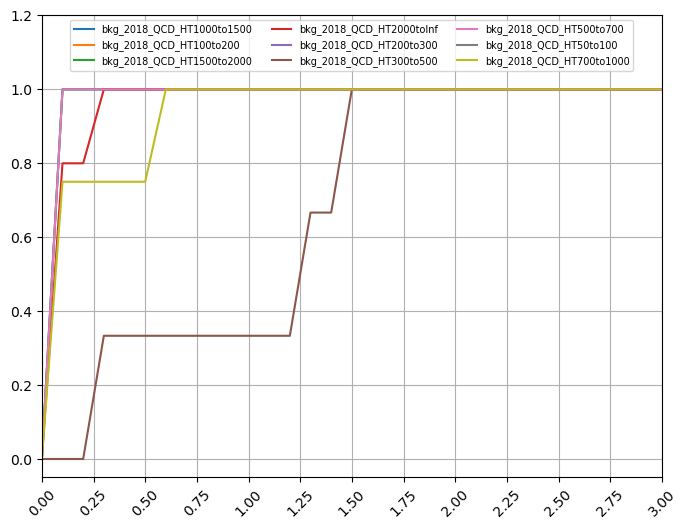

In [15]:
# dR/pT
hname = "sel_vtx_dR_over_pT"
makeEffPlot(hname,[0,3],tickx=0.25)

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


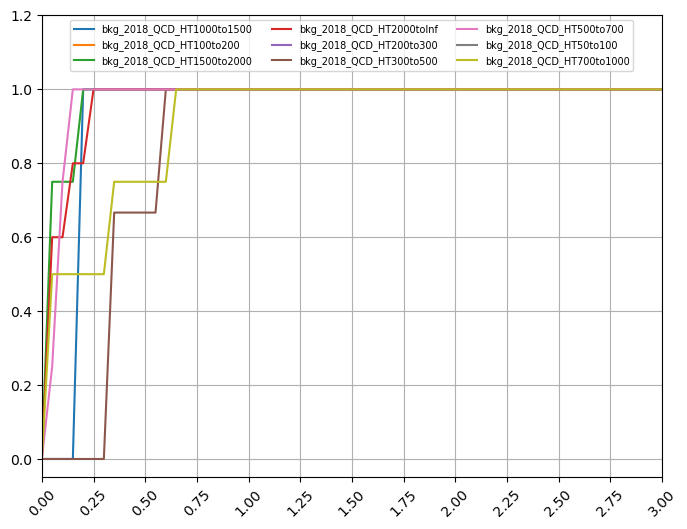

In [16]:
# dR/m
hname = "sel_vtx_dR_over_m"
makeEffPlot(hname,[0,3],tickx=0.25)

# Vertex-MET dPhi

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


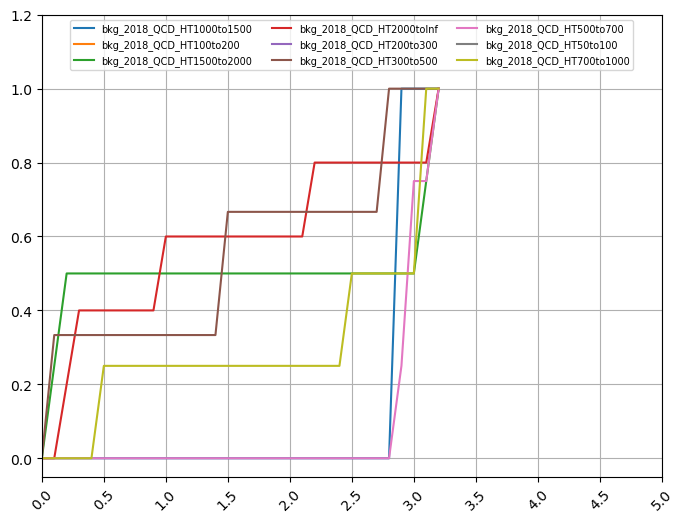

In [17]:
# vtx-MET dPhi
hname = "vtx_met_dPhi"
makeEffPlot(hname,[0,5],tickx=0.5)

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


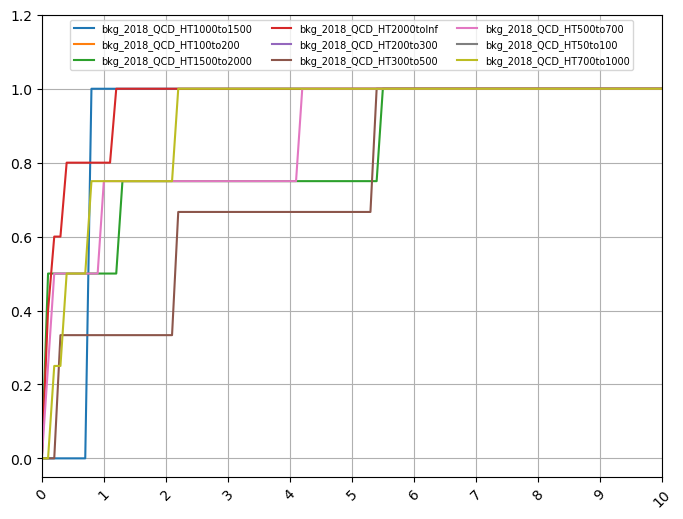

In [18]:
# vtx-MET dPhi / (pT/m)
hname = "sel_vtx_METdPhi_over_pTm"
makeEffPlot(hname,[0,10],tickx=1)

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


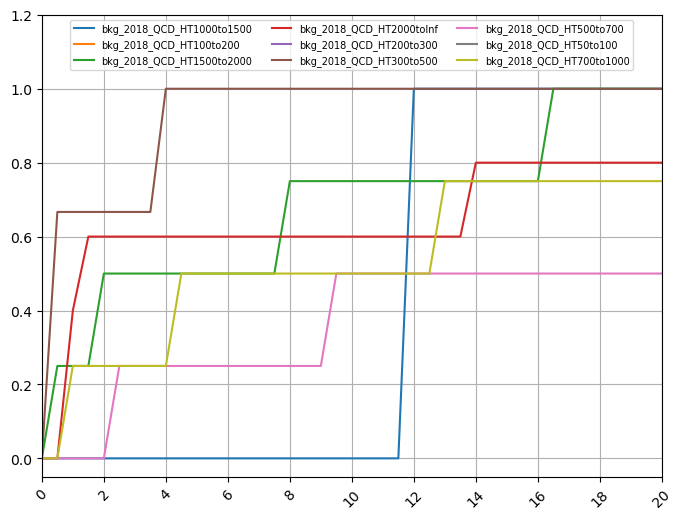

In [19]:
# vtx-MET dPhi / (m/pT)
hname = "sel_vtx_METdPhi_over_mpT"
makeEffPlot(hname,[0,20],tickx=2)

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


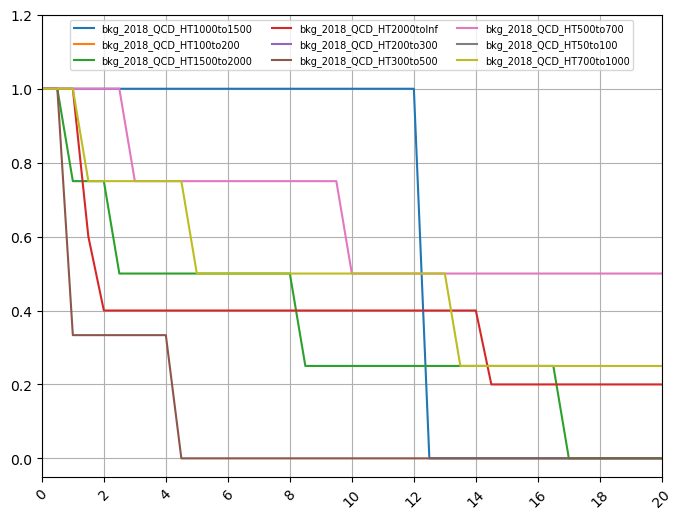

In [20]:
# vtx-MET dPhi / (m/pT) opposite cut
hname = "sel_vtx_METdPhi_over_mpT"
makeEffPlot(hname,[0,20],tickx=2,lessThan=False)

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


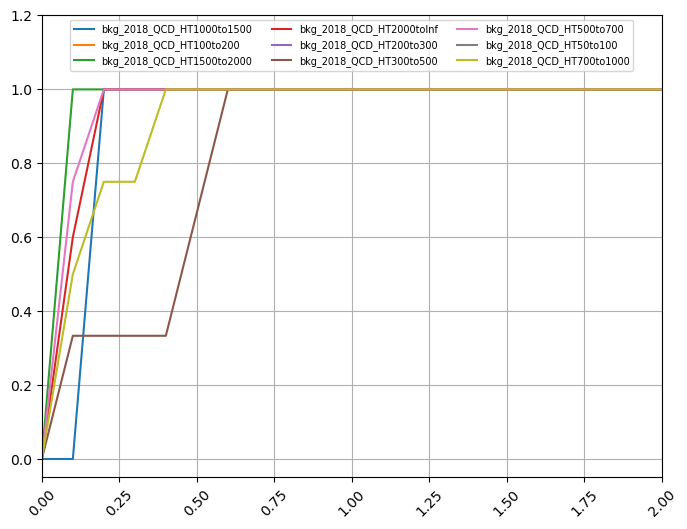

In [21]:
# vtx-MET dPhi / pT
hname = "sel_vtx_METdPhi_over_pT"
makeEffPlot(hname,[0,2],tickx=0.25)

/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/plotTools.py:34: RuntimeWarning: invalid value encountered in true_divide
  eff = s/np.sum(h.counts(flow=True))


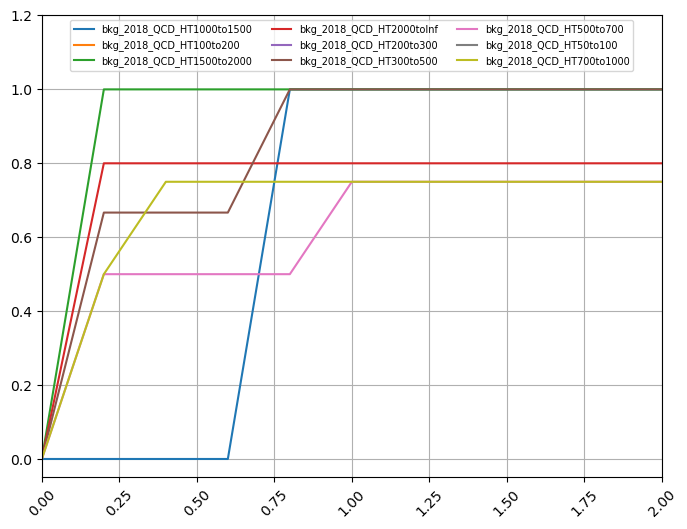

In [22]:
# vtx-MET dPhi / m
hname = "sel_vtx_METdPhi_over_m"
makeEffPlot(hname,[0,2],tickx=0.25)